<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/z_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Medical Images Analysis using Deep Learning**

> Ghulam Mustafa  (19BTCS051HY)

> Mohd Shafi  (19BTCS004HY)

#Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

#Directory locations for the image datasets

In [2]:
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

#Preprocessing steps for the test dataset

In [3]:
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)

#Global parameters

In [4]:
img_dim = 224
batch_size = 32

#Loading the test dataset into the program

In [5]:
test_ds = test_generator.flow_from_directory(
    test_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 613 images belonging to 2 classes.


#Picking up some sample images for prediction

In [6]:
sample = test_ds.next()

x_test, y_test = sample

print(x_test.shape)
print(y_test.shape)

(32, 224, 224, 3)
(32,)


#Lookup at 18 sample images

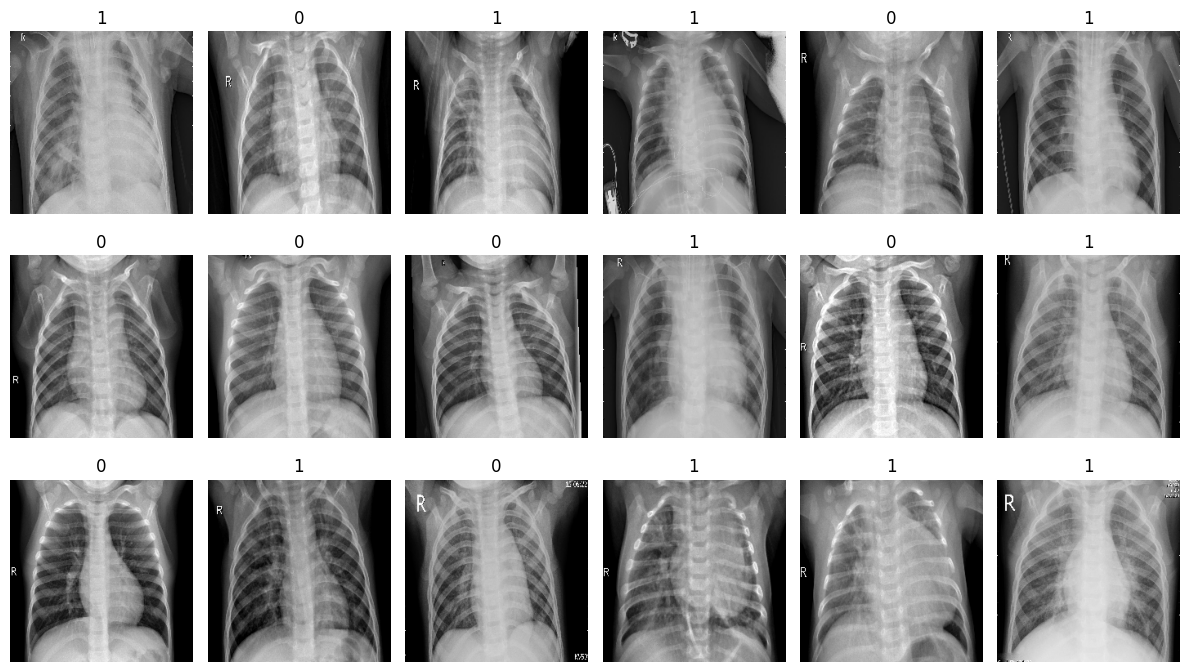

In [7]:
plt.figure(figsize=(12, 7))
for i in range(3*6):
  plt.subplot(3, 6, i+1)
  plt.imshow(x_test[i])
  plt.title(int(y_test[i]))
  plt.axis('off')
plt.tight_layout()
plt.show()

0 - Normal Images
1 - Pneumonia Affected Images

#Load our previously trained model into the program

In [8]:
model_location = '/content/drive/MyDrive/lenet_h5_model2.h5'
model = load_model(model_location)

#Make predictions on those 18 selected images

In [9]:
pred = model.predict(x_test)

for i in pred[:18]:
  print(0 if i < 0.5 else 1, end=', ')

1/1 [==============================] - 6s 6s/step
1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 

#**Interface Designing Steps**
for user interaction

#Install and import required UI designing python library

In [10]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [11]:
import gradio

#Make prediction on the image given by user
This is is an API interface which accept image and ask to the model predict output and return response string as,


> Normal Image

> Pneumonia Affected Image





In [12]:
def make_prediction(input_image):
  input_image = np.array(input_image)/255.0
  input_image = input_image.reshape(-1, 224, 224, 3)
  prediction = model.predict(input_image)[0]
  res = "Normal Image" if prediction < 0.5 else "Pneumonia Affected Image"
  return res

In [13]:
input_image = gradio.Image(shape=(img_dim, img_dim))
label = gradio.Label(num_top_classes=1)

#User Interface designing steps

In [14]:
desc = "<h2><b>Usage: </b></h2>" \
              "<ul>" \
              "<li>Drop or upload an image in given section" \
              "<li>Click on submit to make prediction</li>" \
              "<li>Click on clear to remove image</li>" \
              "</ul>"

interface = gradio.Interface(
    fn = make_prediction,
    title = "Pneumonia Detection using Chest X-Ray",
    description=desc,
    inputs = input_image,
    outputs = label,
    allow_flagging='never',
)

#Execute user interface

In [15]:
interface.launch(debug=False, share=True,)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c216c6c890ebde832a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**What next ?** <br>
Critical domains such as healthcare are requires very high accuracy for the machine learning models, since we are good to situation, but we have to improve the accuracy of the model as much possible.